# Importing Packages

In [96]:
import cv2
import numpy as np

In [97]:
from matplotlib import pyplot as plt

In [98]:
!pip install imutils

In [5]:
!pip install pytesseract

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [99]:
import imutils
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

## Reading Images

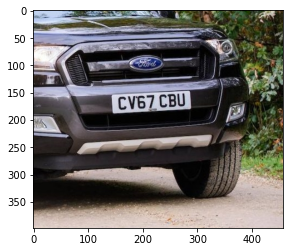

In [100]:
img=cv2.imread(r'C:\Users\tanma\Pictures\Saved Pictures\Input.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Resize the image to the required size and then grayscale it

# Bilateral filter (Blurring) will remove the unwanted details from an image. In this case the license plate is the usefull information the rest are pretty much useless for our program.

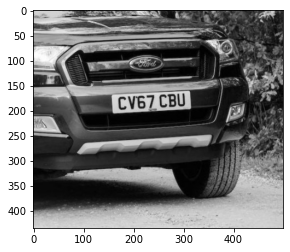

In [101]:
img = imutils.resize(img, width=500 )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise

# Perform Edge detection

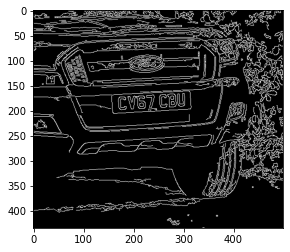

In [102]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Finding the contours on the image

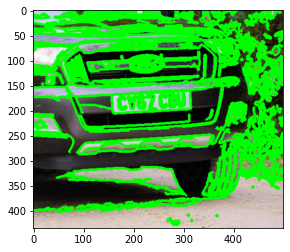

In [103]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1=img.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

# Sorts contours based on minimum area 30 and ignores the ones below that

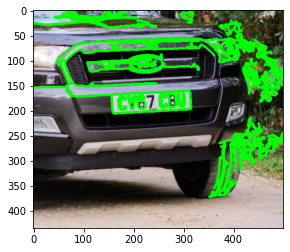

In [104]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
screenCnt = None #will store the number plate contour
img2 = img.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3) 
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) #top 30 contours
count=0

# Finding the lisence plate by looping every contour. If the license plate is not found it displays No contour detected

In [105]:
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break
if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

# Masking the entire picture except for the place where the number plate is

In [106]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

# Extracting the license plate out of the masked image by cropping it and saving it as a new image

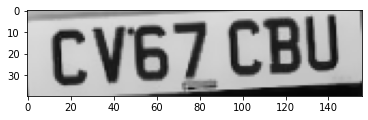

In [107]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.imshow(cv2.cvtColor(Cropped, cv2.COLOR_BGR2RGB))

# Reading the number plate information from the segmented image.

# Using pytesseract package we can read characters from image

In [108]:
text = pytesseract.image_to_string(Cropped, config='--psm 11')
print("programming_fever's License Plate Recognition\n")
print("Detected license plate Number is:",text)
img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))

programming_fever's License Plate Recognition

Detected license plate Number is: CV67 CBU

